In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.utils import np_utils

% matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

/Users/naman/miniconda3/envs/kaggle/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Loading Data

In [2]:
from mnist import MNIST
mndata = MNIST('./mnist/', gz=True)
images, labels = mndata.load_training()

In [3]:
def normalize(images):
    for i in range(len(images)):
        images[i] = images[i]/np.linalg.norm(images[i])
    return images
images = normalize(images)

### Get Test, Train, Validation Set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
testLabels = y_test
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

In [21]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_val = np_utils.to_categorical(y_val)

### Buid Model

In [22]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
#model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
#model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=50, batch_size=128,validation_data=(X_val, y_val))

Train on 38400 samples, validate on 9600 samples
Epoch 1/50
38400/38400 [==============================] - 7s 194us/step - loss: 0.0112 - acc: 0.9969 - val_loss: 0.0892 - val_acc: 0.9764
Epoch 2/50
38400/38400 [==============================] - 8s 206us/step - loss: 0.0079 - acc: 0.9981 - val_loss: 0.1024 - val_acc: 0.9760
Epoch 3/50
38400/38400 [==============================] - 10s 251us/step - loss: 0.0065 - acc: 0.9985 - val_loss: 0.0887 - val_acc: 0.9794
Epoch 4/50
38400/38400 [==============================] - 10s 250us/step - loss: 0.0056 - acc: 0.9985 - val_loss: 0.0951 - val_acc: 0.9777
Epoch 5/50
38400/38400 [==============================] - 8s 221us/step - loss: 0.0111 - acc: 0.9962 - val_loss: 0.1086 - val_acc: 0.9757
Epoch 6/50
38400/38400 [==============================] - 11s 283us/step - loss: 0.0087 - acc: 0.9973 - val_loss: 0.1058 - val_acc: 0.9750
Epoch 7/50
38400/38400 [==============================] - 10s 268us/step - loss: 0.0055 - acc: 0.9983 - val_loss: 0.1136

In [24]:
model.evaluate(X_test,y_test,verbose=1)

12000/12000 [==============================] - 1s 92us/step


[0.08770164245343767, 0.9763333333333334]

In [25]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

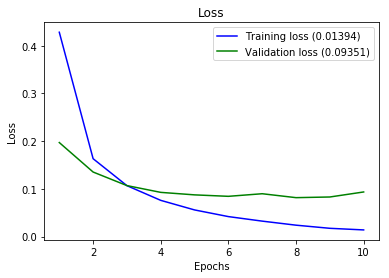

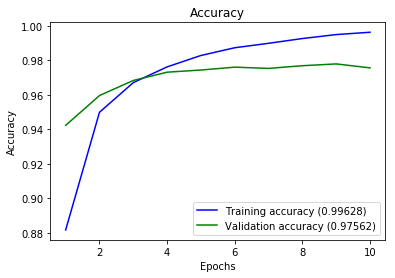

In [26]:
plot_history(history)

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
y_pred = model.predict_classes(X_test)

In [29]:
confusion_matrix(testLabels,y_pred, labels=[0,1,2,3,4,5,6,7,8,9])

array([[1164,    0,    2,    0,    1,    0,    2,    1,    3,    2],
       [   0, 1319,    0,    0,    1,    0,    1,    0,    0,    1],
       [   1,    6, 1152,    4,    1,    0,    1,    6,    2,    1],
       [   2,    2,   20, 1167,    1,    7,    0,    4,   13,    3],
       [   3,    0,    2,    0, 1160,    0,    0,    2,    1,    8],
       [   9,    5,    2,   14,    4, 1050,   13,    3,    3,    1],
       [   8,    1,    1,    0,    2,    0, 1162,    1,    2,    0],
       [   1,    7,    9,    0,    3,    0,    0, 1272,    3,    4],
       [   4,    4,    3,    3,    2,    4,    3,    3, 1130,    4],
       [   5,    1,    1,    0,   27,    1,    1,   13,    5, 1140]])